# Multinomial Naive Bayes Email Spam Detection

In [5]:
import pandas as pd
df=pd.read_csv("email.csv")

inputs=df.Message

target=df.Category.apply(lambda x:1 if x=="spam" else 0)

from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()
inputs2=cv.fit_transform(inputs)

from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(inputs2,target,test_size=0.25)

model.fit(x_train,y_train)

model.score(x_test,y_test)


0.9856527977044476

In [4]:
target

0       0
1       0
2       1
3       0
4       0
       ..
5568    0
5569    0
5570    0
5571    0
5572    0
Name: Category, Length: 5573, dtype: int64

In [3]:
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


# Using Pipeline

In [6]:
x_train2,x_test2,y_train2,y_test2=tts(df.Message,df.Category.apply(lambda x:1 if x=="spam" else 0))

from sklearn.pipeline import Pipeline
clf=Pipeline([("vectorizer",CountVectorizer()),("nb",MultinomialNB())])

clf.fit(x_train2,y_train2)

clf.score(x_test2,y_test2)
predicted=pd.DataFrame()
predicted['Mails']=x_test2
predicted['Classifier']=(clf.predict(x_test2))

for i in (predicted[predicted["Classifier"]==1][:10]["Mails"]):
    print(i)

1000's flirting NOW! Txt GIRL or BLOKE & ur NAME & AGE, eg GIRL ZOE 18 to 8007 to join and get chatting!
Hi 07734396839 IBH Customer Loyalty Offer: The NEW NOKIA6600 Mobile from ONLY £10 at TXTAUCTION!Txt word:START to No:81151 & get Yours Now!4T&
We know someone who you know that fancies you. Call 09058097218 to find out who. POBox 6, LS15HB 150p
SMS SERVICES For your inclusive text credits pls gotto www.comuk.net login 3qxj9 unsubscribe with STOP no extra charge help 08702840625 comuk.220cm2 9AE
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed £1000 cash or £5000 prize!
Todays Voda numbers ending with 7634 are selected to receive a £350 reward. If you have a match please call 08712300220 quoting claim code 7684 standard rates apply.
Think ur smart ? Win £200 this week in our weekly quiz, text PLAY to 85222 now!T&Cs WinnersClub PO BOX 84, M26 3UZ. 16+. GBP1.50/week
Had your mobile 10 mths? Update to the latest Cam

In [223]:
predicted

,Mails,Classifier
3357,Ok not a problem will get them a taxi. C ing ...,0
2519,Joy's father is John. Then John is the NAME of...,0
2570,Ultimately tor motive tui achieve korli.,0
3320,Kay... Since we are out already,0
1375,"500 New Mobiles from 2004, MUST GO! Txt: NOKIA...",1
...,...,...
2684,I'm okay. Chasing the dream. What's good. What...,0
4656,Our Prasanth ettans mother passed away last ni...,0
3029,You have got tallent but you are wasting.,0
2156,What year. And how many miles.,0


In [8]:
y_pred=clf.predict(x_test2)

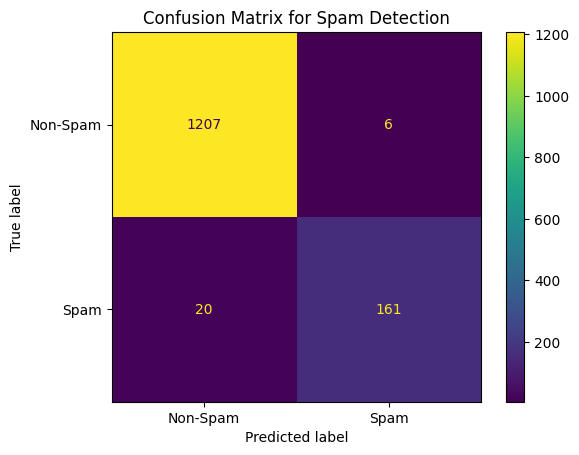

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test2, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Non-Spam', 'Spam'])

disp.plot(cmap='viridis')
plt.title('Confusion Matrix for Spam Detection')
plt.show()

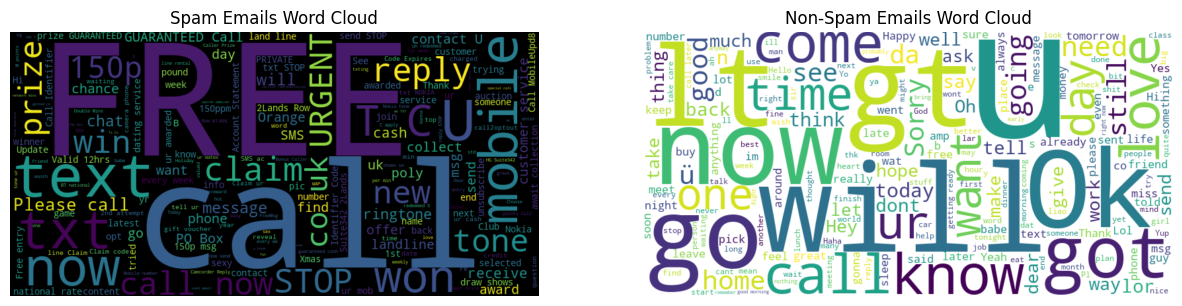

In [219]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
spam_emails = df[df['Category'] == 'spam']['Message']
non_spam_emails = df[df['Category'] == 'ham']['Message']
spam_words = ' '.join(spam_emails)
non_spam_words = ' '.join(non_spam_emails)

spam_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(spam_words)
non_spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_spam_words)


plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.title('Spam Emails Word Cloud')
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Non-Spam Emails Word Cloud')
plt.imshow(non_spam_wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

(-0.5, 799.5, 399.5, -0.5)

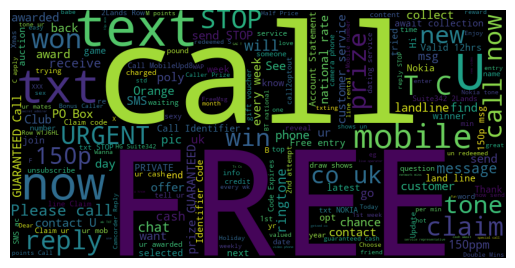

In [217]:
plt.imshow(spam_wordcloud)
plt.axis('off')